In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/quebec-census')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('quebec-census-data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13499 entries, 0 to 13498
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   geo-uid        13499 non-null  int64  
 1   labour         13499 non-null  float64
 2   income         13308 non-null  float64
 3   single-parent  13499 non-null  float64
 4   no-highschool  13499 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 527.4 KB


In [ ]:
df.describe()

,geo-uid,labour,income,single-parent,no-highschool
count,1.349900e+04,13499.000000,13308.000000,13499.000000,13499.000000
mean,2.438915e+07,7.729336,33522.344454,0.175414,0.209569
std,2.096627e+06,5.385693,9131.662168,0.083849,0.105060
min,2.401000e+03,0.000000,7512.000000,0.000000,0.000000
25%,2.443003e+07,4.300000,27136.000000,0.115385,0.130435
50%,2.465022e+07,6.800000,32448.000000,0.157895,0.197917
75%,2.466317e+07,10.300000,38638.000000,0.222222,0.276190
max,2.499025e+07,57.100000,109824.000000,0.692308,0.838235


In [ ]:
df.columns

Index(['geo-uid', 'labour', 'income', 'single-parent', 'no-highschool'], dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_drop = df[[col for col in list(df.columns) if col not in ['geo-uid', 'labour','single-parent']]]

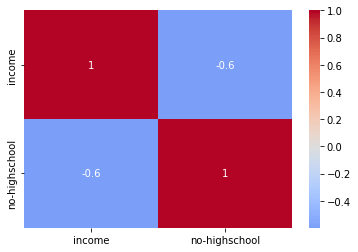

In [ ]:
# correlation matrix amoing SES factors, by dissemination area from 2016 census

plt.figure()
sns.heatmap(df_drop.corr(), annot = True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
# scale data between 0-1

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = scaler.fit_transform(df_drop),
                         columns = df_drop.columns)
df_scaled.head()

,income,no-highschool
0,1.000000,0.045885
1,0.989991,0.119298
2,0.844867,0.140351
3,0.822347,0.073039
4,0.798997,0.210527


Text(0.5, 1.0, 'Elbow Curve to find optimal k')

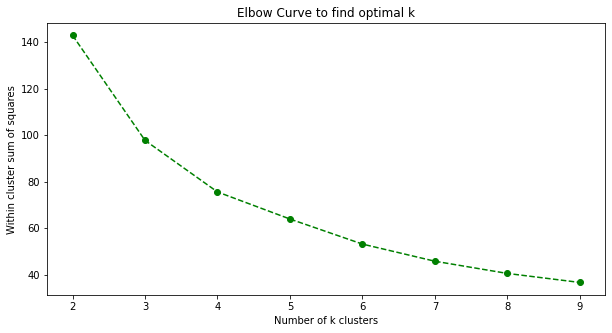

In [ ]:
k = list(range(2,10))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of k clusters')
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Curve to find optimal k')

In [ ]:
# building k-means model

# Instantiating
kmeans3 = KMeans(n_clusters = 3)

# Training the model
kmeans3.fit(df_scaled)

# predicting
y_pred = kmeans3.fit_predict(df_scaled)
print(y_pred)

# Storing the y_pred values in a new column
df['cluster'] = y_pred+1 #to start the cluster number from 1

[2 2 2 ... 0 0 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13308 entries, 0 to 13307
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   geo-uid        13308 non-null  int64  
 1   labour         13308 non-null  float64
 2   income         13308 non-null  float64
 3   single-parent  13308 non-null  float64
 4   no-highschool  13308 non-null  float64
 5   cluster        13308 non-null  int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 675.8 KB


In [ ]:
df.describe()

,geo-uid,labour,income,single-parent,no-highschool,cluster
count,1.330800e+04,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000
mean,2.438611e+07,7.686144,33522.344454,0.175816,0.208443,1.841298
std,2.111168e+06,5.200444,9131.662168,0.083208,0.103185,0.844880
min,2.401000e+03,0.000000,7512.000000,0.000000,0.000000,1.000000
25%,2.443004e+07,4.300000,27136.000000,0.115385,0.130435,1.000000
50%,2.465020e+07,6.800000,32448.000000,0.157895,0.197368,2.000000
75%,2.466313e+07,10.200000,38638.000000,0.222222,0.275000,3.000000
max,2.499025e+07,51.100000,109824.000000,0.692308,0.838235,3.000000


In [ ]:
df.to_csv('Quebec postal codes with SES cluster.csv')